In [2]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd # dataframe manipulation
import numpy as np #linear algebra
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re
df = pd.read_csv('bestsellers with categories.csv')

Seaborn verion 0.13.2


In [5]:
df.rename(columns={'User Rating': 'user_rating'}, inplace=True)
df[df.Author.isin(['J. K. Rowling','J.K. Rowling'])]
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling' # replace J. K. Rowling with J.K. Rowling
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))


list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


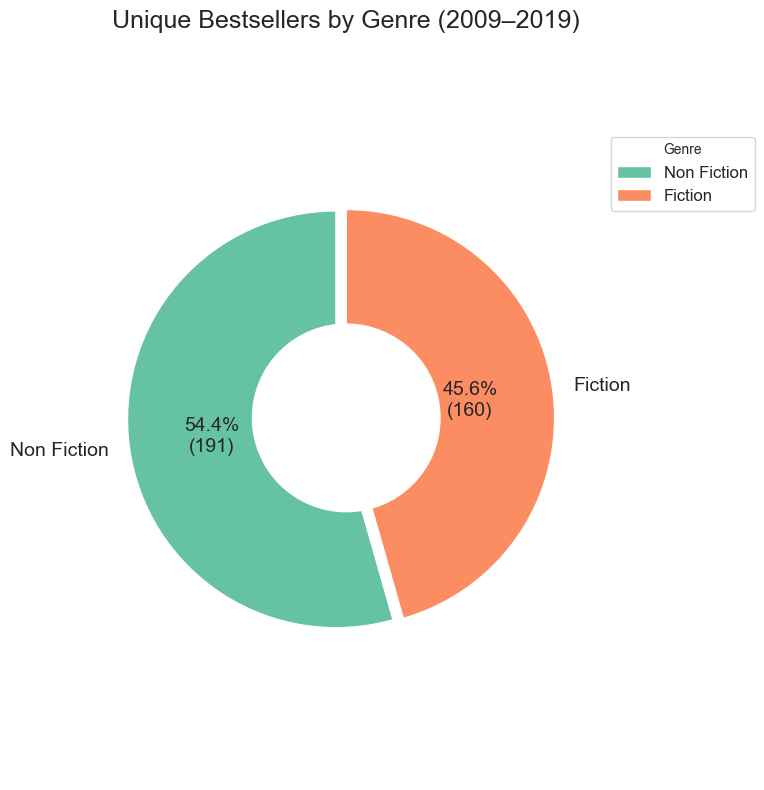

In [12]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup.groupby(['Genre'])['Name'].count().sort_values(ascending=False)

#create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal') # equal aspect ratio ensures that pie chart is a circle

# 3. Custom label function (percent + raw count)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

colors = plt.get_cmap('Set2')(range(len(g_count)))             # more varied, automatically sized
genre_col = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4', '#FF4500', '#8A2BE2']
wedges, texts, autotexts = ax.pie(
    g_count.values,
    labels=g_count.index,
    autopct=make_autopct(g_count),
    pctdistance=0.6,
    startangle=90,
    textprops={'fontsize': 14},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=colors,
    explode=[0.05 if v == g_count.max() else 0 for v in g_count.values]  # “explode” the largest slice
)

centre = plt.Circle((0, 0), 0.45, fc='white')
ax.add_artist(centre)

# 7. Title and legend
ax.set_title('Unique Bestsellers by Genre (2009–2019)', fontsize=18, pad=20)
ax.legend(
    wedges,
    g_count.index,
    title='Genre',
    loc='upper right',
    bbox_to_anchor=(1.3, 0.9),
    fontsize=12
)

plt.tight_layout()
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y

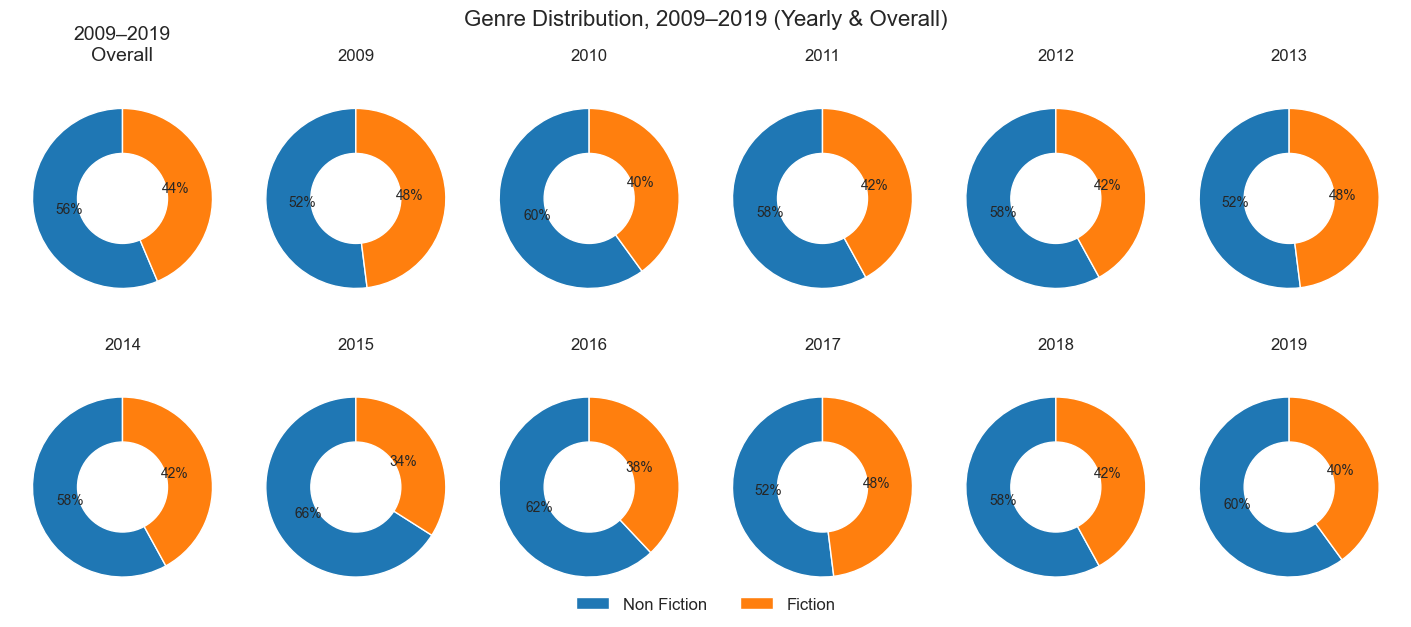

In [17]:
import matplotlib.pyplot as plt

# 1. Prep data
g_total = df['Genre'].value_counts()
years_top = np.arange(2009, 2014)
years_bot = np.arange(2014, 2020)
palette = ['#1f77b4', '#ff7f0e']  # blue / orange

# 2. Figure setup
fig, axes = plt.subplots(2, 6, figsize=(14, 6), constrained_layout=True)
for ax in axes.flatten():
    ax.axis('equal')  # keep donuts perfectly round

# 3. Plot overall
axes[0, 0].pie(
    g_total, labels=None, autopct='%1.0f%%',
    startangle=90, pctdistance=0.6, colors=palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
axes[0, 0].set_title('2009–2019\nOverall', fontsize=14)

# 4. Plot each year
for idx, year in enumerate(years_top):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax = axes[0, idx+1]
    ax.pie(counts, autopct='%1.0f%%', startangle=90,
           pctdistance=0.6, colors=palette,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax.set_title(str(year), fontsize=12)

for idx, year in enumerate(years_bot):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax = axes[1, idx]
    ax.pie(counts, autopct='%1.0f%%', startangle=90,
           pctdistance=0.6, colors=palette,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax.set_title(str(year), fontsize=12)

# 5. Central donuts (making them donuts)
for ax in axes.flatten():
    centre = plt.Circle((0, 0), 0.5, color='white')
    ax.add_artist(centre)

# 6. Legend and super‐title
fig.legend(
    handles=axes[0,0].patches[:2],
    labels=list(g_total.index),
    loc='lower center',
    ncol=2,
    frameon=False,
    fontsize=12
)
fig.suptitle('Genre Distribution, 2009–2019 (Yearly & Overall)', fontsize=16, y=1.02)
plt.show()
